In [123]:
%pip install librosa
%pip install numpy
%pip install scikit-learn
%pip install keras
%pip install matplotlib
%pip install seaborn
%pip install sklearn




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [124]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import joblib

In [125]:
def extract_features(audio_file):
    audio, sr = librosa.load(audio_file, sr=None)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=39)
    mfcc_mean = mfcc.mean(axis=1)
    hnr = extract_hnr(audio)  
    zcr = librosa.feature.zero_crossing_rate(audio).mean()
    teo = extract_teo(audio)  
    
    return np.concatenate([mfcc_mean, [hnr, zcr, teo]])

In [126]:
def extract_hnr(audio, threshold=0.1):
    
    harmonics = np.abs(np.fft.fft(audio))
    noise = np.sum(harmonics[int(threshold * len(harmonics)):])
    harmonic = np.sum(harmonics[:int(threshold * len(harmonics))])
    hnr = harmonic / noise
    return hnr

In [127]:
def extract_teo(audio):
   
    teo = np.sum(audio[1:-1]**2 - audio[:-2] * audio[2:])
    return teo

In [2]:
emotion_folder_path = './emotions/'
emotions = os.listdir(emotion_folder_path)

X = []
y = []

for emotion in emotions:
    emotion_path = os.path.join(emotion_folder_path, emotion)
    for filename in os.listdir(emotion_path):
        if filename.endswith(".wav"):
            audio_path = os.path.join(emotion_path, filename)
            features = extract_features(audio_path)
            X.append(features)
            y.append(emotion)

X = np.array(X)
y = np.array(y)

NameError: name 'os' is not defined

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(X_train_scaled.shape[1], activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, X_train_scaled, epochs=100, batch_size=32)

Epoch 1/100
20/20 [==============================] - 8s 11ms/step - loss: 0.9043
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6883
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6181
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.5280
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4642
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4442
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4263
Epoch 8/100
20/20 [==============================] - 0s 13ms/step - loss: 0.4185
Epoch 9/100
20/20 [==============================] - 0s 14ms/step - loss: 0.4139
Epoch 10/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4073
Epoch 11/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4013
Epoch 12/100
20/20 [==============================] - 0s 12ms/step - loss: 0.3981
Epoch 13/100
20/20 [=====

In [ ]:
# encoder = Sequential(model.layers[:9])
# X_train_encoded = encoder.predict(X_train_scaled)
# X_test_encoded = encoder.predict(X_test_scaled)

In [1]:
gmm = GaussianMixture(n_components=len(emotions), covariance_type='full')
gmm.fit(X_train_scaled)

NameError: name 'GaussianMixture' is not defined

In [133]:
joblib.dump(gmm, 'gmm_model.pkl')

['gmm_model.pkl']

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

In [134]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [135]:
y_pred_gmm = gmm.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)

In [136]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [149]:
print(f'Accuracy with KNN: {accuracy_knn}')

Accuracy with KNN: 0.8115942028985508


In [138]:
y_pred_knn

array(['fear', 'disgust', 'disgust', 'disgust', 'fear', 'happiness',
       'happiness', 'fear', 'sadness', 'surprise', 'fear', 'sadness',
       'happiness', 'disgust', 'disgust', 'disgust', 'angry', 'angry',
       'happiness', 'disgust', 'surprise', 'surprise', 'happiness',
       'sadness', 'fear', 'surprise', 'angry', 'surprise', 'disgust',
       'sadness', 'fear', 'sadness', 'fear', 'angry', 'angry', 'sadness',
       'sadness', 'happiness', 'angry', 'angry', 'disgust', 'disgust',
       'happiness', 'angry', 'sadness', 'surprise', 'disgust', 'fear',
       'surprise', 'angry', 'surprise', 'happiness', 'happiness', 'fear',
       'surprise', 'sadness', 'angry', 'fear', 'fear', 'disgust',
       'disgust', 'happiness', 'angry', 'angry', 'angry', 'happiness',
       'fear', 'angry', 'surprise'], dtype='<U9')

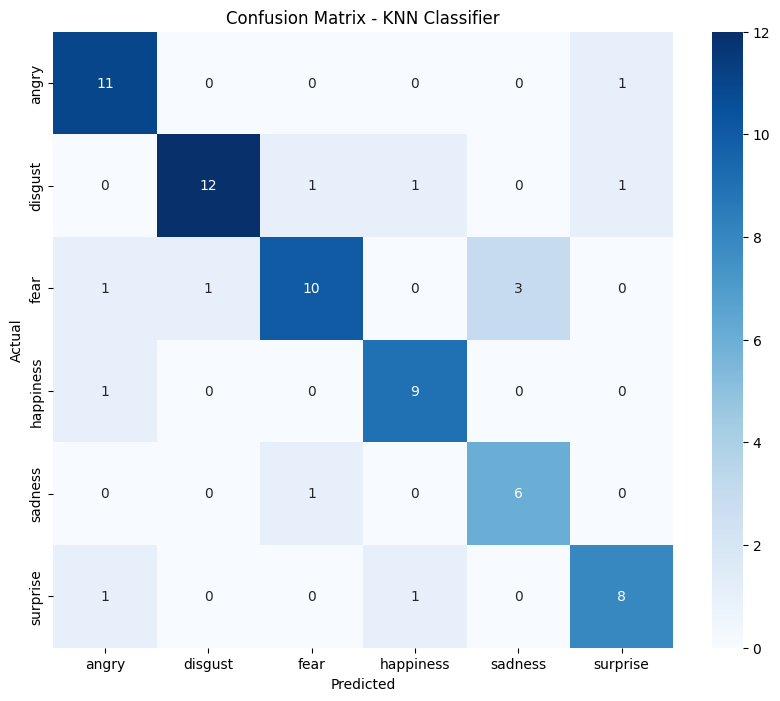

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_knn, labels=emotions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
